**Group-1**

**Title:** Classification of Doremon cartoon characters from a custom Image dataset using a CNN model.

**Team members:**
Santosh Reddy Edulapalle - A20501739
Venkata Siva Rupesh Akurati - A20501754
Jack Harrison Mohr -A20503445

**This is our .ipynb file for the project. We are going to code everything in this file.**

**Image dataset:** We are using OpenCV to read the video and capture image with rate of 1 frame per second.

**ImageSS** This function takes in path of the video and uses OpenCV to read each frame and captures the images.

In [103]:
#code to capture images from videos using Opencv.
import os

#importing cv2 from OpenCV
import cv2
from datetime import datetime

def ImageSS(videoPath):

    videoObject = cv2.VideoCapture(videoPath)
    frameNumber = 1

    # checks whether frames were extracted
    boolean = 1
    start = datetime.now()
    try:
        while boolean:
           # cv2.waitKey(10) {doesnt reduce fps}
            boolean, image = videoObject.read()
            cv2.imwrite("frame%d.jpg" %frameNumber, image)
            frameNumber += 1
    #exception handling
    except:
        print("All the frames are read!")
    finally:
        end = datetime.now()
    #calculating execution time.
    executionTime = (end - start).total_seconds() * 10**3
    print(f"The execution time of above program is : {executionTime:.03f}ms")


The below cell is commented to prevent it from accidental running.Uncomment it to use the program to capture video frames.

In [104]:
#ImageSS("/Users/santosh/Downloads/Doremon_test2.mov")

All the frames are read!
The execution time of above program is : 1799.841ms


**generate_neg_description_txt_file** This function runs over the negative images folder creates a new text tile with all the names in negative image folder + negative tag attached to it.

In [70]:
#Uncomment this only when needed.
#Creating our own cascade classifier from scratch.
# we are going to train the classifier with our own doremon data.
#generating negative texts for background/( unimportant) data
# def generate_neg_description_txt_file():
#     with open('negative.txt','w') as f:
#         for imageName in os.listdir('negative'):
#             f.write('negative/' + imageName + '\n')
# generate_neg_description_txt_file()

negatives.txt is relatively easy to do. But for positives.txt, we need to manually upload the frame of the face for each image. To help with it, openCV has annotations app which is only available on version 3x.

 We installed openCV 3.4.16 to use its annotations functions. For the rest of the project, we will be using openCV latest version.
Having had so many troubles with openCV 3.4.16 on my mac, and spending one full day on debugging, I decided to move on to a windows PC and finish the annotation process. I will be transferring the trained model, related files ( annotations.txt) to this mac for further project build.

The code for creating/ generating positive text samples for positive ( target characters) is entirely done on CMD. We used opencv_annotations, opencv_createsamples, opencv_traincascade from opencv 3.4.16 version and stored the required models in respective .xml files. The models we created are: cascadeAll.xml,doremon.xml,nobita.xml,shizuka.xml

Reference - Opencv official documentation.
https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html


In [71]:


'''
#changes yet to make.
import numpy as np

# settings
videopath = '/Users/santosh/Desktop/dorVid/'
exclusion = {
    '.DS_Store'
}

# gets the import location for videos (dataset).
def get_dataset(videopath=videopath):
    videos = os.listdir(os.path.dirname(videopath))
    for item in videos:
        if item in exclusion:
            videos.remove(item)
    return videos

# detect character by using a custom trained haar cascade for each character.
def detect(character, video, show_video=True):
    cap = cv2.VideoCapture(videopath + video)
    Dor_face_cascade = cv2.CascadeClassifier('cascadeAll.xml')
    results_path = os.path.join('results/' + "Dor_char")

    # make a folder in results for our recognised faces.
    if not os.path.exists(results_path) and character['save'] == True:
        os.mkdir(results_path)

    while(1):
        # grab a frame.
        ret, frame = cap.read()
        faces = None


        if character['name'] == "Doremon":
            # detect faces in our image.
            # try only with frame, no extra parameters.
            faces = Dor_face_cascade.detectMultiScale(frame,
                                                  scaleFactor=1.05,
                                                  minNeighbors=4,
                                                  minSize=(24, 24),
                                                  flags=cv2.CASCADE_SCALE_IMAGE
                                                  )
        elif character['name'] == "Nobita":
            faces = Dor_face_cascade.detectMultiScale(frame,
                                                  scaleFactor=1.05,
                                                  minNeighbors=50,
                                                  minSize=(24, 24),
                                                  flags=cv2.CASCADE_SCALE_IMAGE
                                                  )
        elif character['name'] == "Shizuka":
            faces = Dor_face_cascade.detectMultiScale(frame,
                                                      scaleFactor=1.05,
                                                      minNeighbors=50,
                                                      minSize=(24, 24),
                                                      flags=cv2.CASCADE_SCALE_IMAGE
                                                      )

        # loop over detected faces.
        for (x, y, w, h) in faces:
            # setup region of interest (ROI) for the captured face.
            roi = frame[y:y+h, x:x+w]

            frame_number = str(int(cap.get(cv2.CAP_PROP_POS_FRAMES)))

            # write detected face to disk.
            if character['save'] == True:
                cv2.imwrite(results_path + '/' + "character" + '_frame_' + frame_number + '.png', roi)

            if show_video is True:
                # display detection box for visual purposes.
                cv2.rectangle(frame, (x, y), (x+w, y+h), character['detect_color'], 2)
                cv2.putText(frame, character['name'], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
            else:
                print('detected face @ frame ' + frame_number)

        if show_video is True:
            # display our image.
            try:
                cv2.imshow('frame', frame)
            except:
                break

            # quit or (next video) on esc.
            esc = cv2.waitKey(30) & 0xff
            if esc == 27:
                break

    # destroy & release resources.
    cv2.destroyAllWindows()
    cap.release()

# process all our videos.
def process(character):
    videos = get_dataset()
    print('number of videos: ' + str(len(videos)))

    for video in enumerate(videos):
        episode = video[1]

        # dump frames and save to disk each character.
        print('attempting to detect ' + character['name'] +  ' in \'' + episode + '\'')

        # detect our character.
        detect(character, video[1], show_video=True)

def main():
    # step 1: prepare our results folder.
    if not os.path.exists('results'):
        os.mkdir('results')

    # step 2: process all our videos to detect Tom & Jerry.
    characters = [
        {
            'name':      "Doremon",
            'detect_color': (26,225,248),
            'save':		 True,
            'cascade':   'doremon.xml'
        },
        {
            'name':      "Nobita",
            'detect_color': (236,195, 80),
            'save':		 True,
            'cascade':   'nobita.xml'
        },
        {
            'name':      "Shizuka",
            'detect_color': (255,182,193),
            'save':		 True,
            'cascade':   'shizuka.xml'
        }
    ]
    # process characters...
    [process(character) for character in characters]
    print('done')

if __name__ == '__main__':
    main()
'''

'\n#changes yet to make.\nimport numpy as np\n\n# settings\nvideopath = \'/Users/santosh/Desktop/dorVid/\'\nexclusion = {\n    \'.DS_Store\'\n}\n\n# gets the import location for videos (dataset).\ndef get_dataset(videopath=videopath):\n    videos = os.listdir(os.path.dirname(videopath))\n    for item in videos:\n        if item in exclusion:\n            videos.remove(item)\n    return videos\n\n# detect character by using a custom trained haar cascade for each character.\ndef detect(character, video, show_video=True):\n    cap = cv2.VideoCapture(videopath + video)\n    Dor_face_cascade = cv2.CascadeClassifier(\'cascadeAll.xml\')\n    results_path = os.path.join(\'results/\' + "Dor_char")\n\n    # make a folder in results for our recognised faces.\n    if not os.path.exists(results_path) and character[\'save\'] == True:\n        os.mkdir(results_path)\n\n    while(1):\n        # grab a frame.\n        ret, frame = cap.read()\n        faces = None\n\n\n        if character[\'name\'] == 

In [72]:
#testing doremon.xml for one single image of doremon.
# Reference - official example from opencv website.

# import numpy as np
#
# from matplotlib import pyplot as plt
#
# face_cascade = cv2.CascadeClassifier('doremon.xml')
# #eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#
# img = cv2.imread('/Users/santosh/Documents/CS584/Images/frame279.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#
# faces = face_cascade.detectMultiScale(gray, 1.05, 4)
#
#
# for (x,y,w,h) in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     # eyes = eye_cascade.detectMultiScale(roi_gray)
#     # for (ex,ey,ew,eh) in eyes:
#     #     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Decided to move on with manually cropped and labeled data as of now.
Reference - Tensorflow official documentation.
https://www.tensorflow.org/tutorials/images/classification

Found 1690 files belonging to 6 classes.
Using 1352 files for training.
Found 1690 files belonging to 6 classes.
Using 338 files for validation.
['Doremon_happy', 'Doremon_sad', 'Nobita_happy', 'Nobita_sad', 'Shizuka_happy', 'Shizuka_sad']


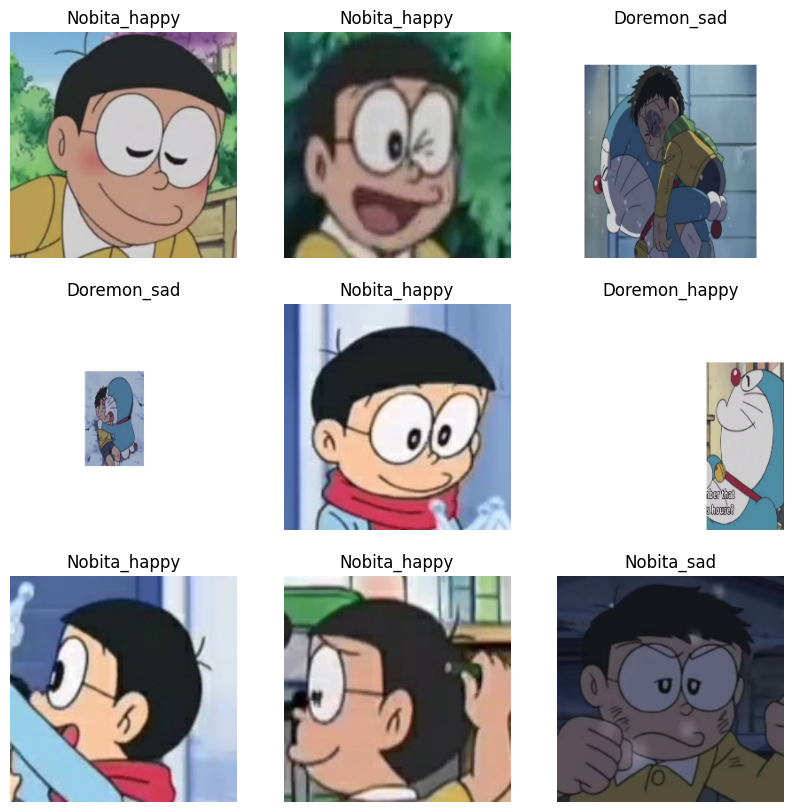

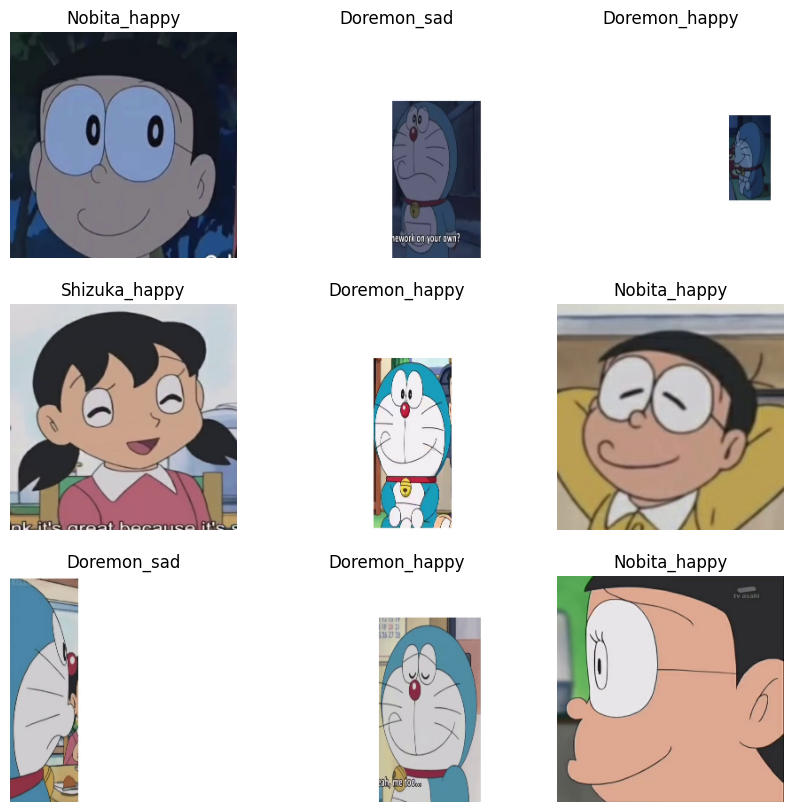

In [73]:
#required libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#sequnetial models are more time consuming than parallel models, because they perform iteratively.

# path to dataset.



path = "/Users/santosh/Documents/CS584/dataset/train/"
img_height = 256
img_width = 256


#training ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    validation_split = 0.2,
    subset = "training",
    seed = 108,
    batch_size = 32,
    image_size = (img_height, img_width)
)

#validation ds
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    validation_split = 0.2,
    subset = "validation",
    seed = 108,
    batch_size = 32,
    image_size = (img_height, img_width)
)


#class names
class_names = train_ds.class_names
print(class_names)

#visualising the data


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [74]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


As we can see, our image batch consists of 32 image samples with each image being of size 256x256x3. 3-RGB
image_batch is a tensor.


In [75]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

dataset.cache() keeps the images in memory after first epoch.
dataset.prefetch() overlaps data Processing and model execution while training.

RGB consists of values from [0,255] which will be not good for creating a NN.
we will Rescale the values between [0,1].

In [76]:
normalization_layer = layers.Rescaling(1./255)

In [77]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.14422488 1.0


Create the model
The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

In [78]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compile the model
For this tutorial, choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

Adam optimizer - https://www.geeksforgeeks.org/intuition-of-adam-optimizer/

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

Model training

In [81]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
43/43 [==============================] - 17s 385ms/step - loss: 1.6617 - accuracy: 0.4371 - val_loss: 0.8477 - val_accuracy: 0.6183
Epoch 2/10
43/43 [==============================] - 17s 400ms/step - loss: 0.5422 - accuracy: 0.7848 - val_loss: 0.4998 - val_accuracy: 0.8166
Epoch 3/10
43/43 [==============================] - 16s 375ms/step - loss: 0.2930 - accuracy: 0.8898 - val_loss: 0.3501 - val_accuracy: 0.8787
Epoch 4/10
43/43 [==============================] - 16s 375ms/step - loss: 0.1489 - accuracy: 0.9534 - val_loss: 0.3834 - val_accuracy: 0.8846
Epoch 5/10
43/43 [==============================] - 17s 388ms/step - loss: 0.0780 - accuracy: 0.9712 - val_loss: 0.3435 - val_accuracy: 0.9053
Epoch 6/10
43/43 [==============================] - 16s 375ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.3266 - val_accuracy: 0.9290
Epoch 7/10
43/43 [==============================] - 16s 373ms/step - loss: 0.0810 - accuracy: 0.9704 - val_loss: 0.3339 - val_accuracy: 0.8994

Visualizing the results.

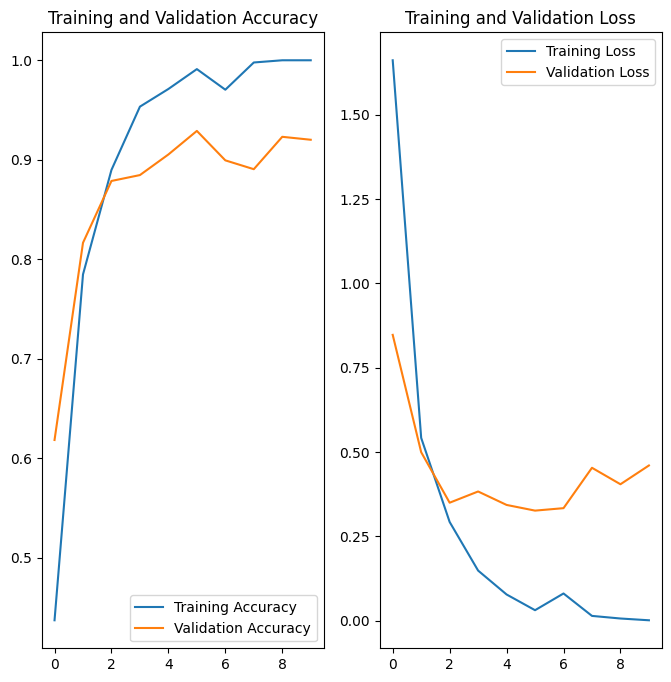

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The graph shows that model has achieved around 77% accuracy for validation data.

We can see that, the model has good training accuracy but less validation accuracy which is a symbol of Overfitting.

Since we have very less data in certain emotions, our model learned a lot from noises and failed to recognise new data.

We will use data augmentation to generate additinal training samples.




In [93]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

Visualising new augmented samples.

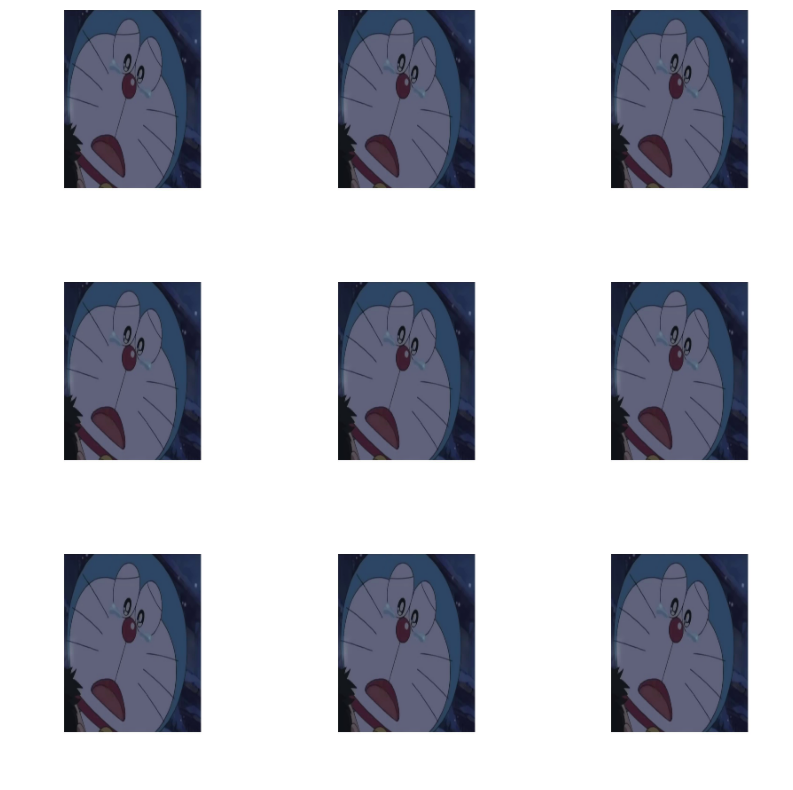

In [94]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [95]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

Compile and train the model

In [96]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [98]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
43/43 [==============================] - 21s 439ms/step - loss: 1.4678 - accuracy: 0.3698 - val_loss: 0.9858 - val_accuracy: 0.5059
Epoch 2/15
43/43 [==============================] - 19s 431ms/step - loss: 0.8076 - accuracy: 0.6457 - val_loss: 0.7856 - val_accuracy: 0.6302
Epoch 3/15
43/43 [==============================] - 18s 419ms/step - loss: 0.6329 - accuracy: 0.7093 - val_loss: 0.7911 - val_accuracy: 0.5947
Epoch 4/15
43/43 [==============================] - 18s 418ms/step - loss: 0.5017 - accuracy: 0.7766 - val_loss: 0.7418 - val_accuracy: 0.6450
Epoch 5/15
43/43 [==============================] - 18s 427ms/step - loss: 0.4555 - accuracy: 0.8158 - val_loss: 0.7494 - val_accuracy: 0.6479
Epoch 6/15
43/43 [==============================] - 18s 420ms/step - loss: 0.4248 - accuracy: 0.8166 - val_loss: 0.8421 - val_accuracy: 0.6361
Epoch 7/15
43/43 [==============================] - 18s 418ms/step - loss: 0.3915 - accuracy: 0.8417 - val_loss: 0.8040 - val_accuracy: 0.6657

Visualising

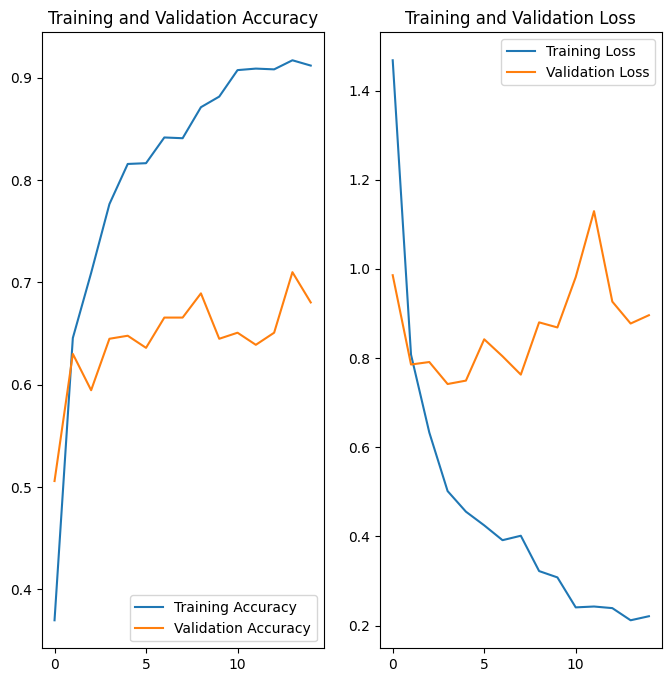

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predicting results

1/1 [==============================] - 0s 69ms/step
This image most likely belongs to Shizuka_sad with a 93.21 percent confidence.


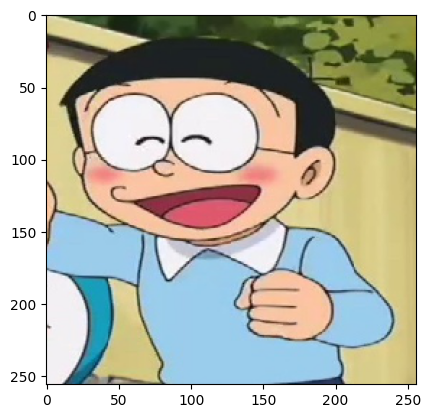

In [106]:
test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame2631.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)